In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt


In [2]:
df = pd.read_csv('nba2k-full.csv')
df.head()

,full_name,rating,jersey,team,position,b_day,height,weight,salary,country,draft_year,draft_round,draft_peak,college,version
0,LeBron James,97,#23,Los Angeles Lakers,F,12/30/84,6-9 / 2.06,250 lbs. / 113.4 kg.,$37436858,USA,2003,1,1,NaN,NBA2k20
1,Kawhi Leonard,97,#2,Los Angeles Clippers,F,06/29/91,6-7 / 2.01,225 lbs. / 102.1 kg.,$32742000,USA,2011,1,15,San Diego State,NBA2k20
2,Giannis Antetokounmpo,96,#34,Milwaukee Bucks,F-G,12/06/94,6-11 / 2.11,242 lbs. / 109.8 kg.,$25842697,Greece,2013,1,15,NaN,NBA2k20
3,Kevin Durant,96,#7,Brooklyn Nets,F,09/29/88,6-10 / 2.08,230 lbs. / 104.3 kg.,$37199000,USA,2007,1,2,Texas,NBA2k20
4,James Harden,96,#13,Houston Rockets,G,08/26/89,6-5 / 1.96,220 lbs. / 99.8 kg.,$38199000,USA,2009,1,3,Arizona State,NBA2k20


In [3]:
df.shape

(464, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464 entries, 0 to 463
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   full_name    464 non-null    object
 1   rating       464 non-null    int64 
 2   jersey       464 non-null    object
 3   team         441 non-null    object
 4   position     464 non-null    object
 5   b_day        464 non-null    object
 6   height       464 non-null    object
 7   weight       464 non-null    object
 8   salary       464 non-null    object
 9   country      464 non-null    object
 10  draft_year   464 non-null    int64 
 11  draft_round  464 non-null    object
 12  draft_peak   464 non-null    object
 13  college      388 non-null    object
 14  version      464 non-null    object
dtypes: int64(2), object(13)
memory usage: 54.5+ KB


In [5]:
df.isnull()

,full_name,rating,jersey,team,position,b_day,height,weight,salary,country,draft_year,draft_round,draft_peak,college,version
0,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
459,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
460,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
461,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
462,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
df.isnull().sum()

full_name       0
rating          0
jersey          0
team           23
position        0
b_day           0
height          0
weight          0
salary          0
country         0
draft_year      0
draft_round     0
draft_peak      0
college        76
version         0
dtype: int64

In [7]:
df.isnull().sum().sum()

99

In [8]:
df = df.dropna()

In [9]:
df.isnull().sum().sum()

0

In [10]:
df = df.drop(['full_name','b_day','height','weight','college'], axis=1)
df.head()

,rating,jersey,team,position,salary,country,draft_year,draft_round,draft_peak,version
1,97,#2,Los Angeles Clippers,F,$32742000,USA,2011,1,15,NBA2k20
3,96,#7,Brooklyn Nets,F,$37199000,USA,2007,1,2,NBA2k20
4,96,#13,Houston Rockets,G,$38199000,USA,2009,1,3,NBA2k20
5,95,#30,Golden State Warriors,G,$40231758,USA,2009,1,7,NBA2k20
6,94,#3,Los Angeles Lakers,F-C,$27093019,USA,2012,1,1,NBA2k20


In [11]:
def removeHash(value):
    value = value[1:]
    return int(value)

In [12]:
df['jersey'] = df['jersey'].apply(removeHash)

In [13]:
df.head()

,rating,jersey,team,position,salary,country,draft_year,draft_round,draft_peak,version
1,97,2,Los Angeles Clippers,F,$32742000,USA,2011,1,15,NBA2k20
3,96,7,Brooklyn Nets,F,$37199000,USA,2007,1,2,NBA2k20
4,96,13,Houston Rockets,G,$38199000,USA,2009,1,3,NBA2k20
5,95,30,Golden State Warriors,G,$40231758,USA,2009,1,7,NBA2k20
6,94,3,Los Angeles Lakers,F-C,$27093019,USA,2012,1,1,NBA2k20


In [14]:
df['salary'] = df['salary'].apply(removeHash)

In [15]:
df.head()

,rating,jersey,team,position,salary,country,draft_year,draft_round,draft_peak,version
1,97,2,Los Angeles Clippers,F,32742000,USA,2011,1,15,NBA2k20
3,96,7,Brooklyn Nets,F,37199000,USA,2007,1,2,NBA2k20
4,96,13,Houston Rockets,G,38199000,USA,2009,1,3,NBA2k20
5,95,30,Golden State Warriors,G,40231758,USA,2009,1,7,NBA2k20
6,94,3,Los Angeles Lakers,F-C,27093019,USA,2012,1,1,NBA2k20


In [16]:
df['team'].value_counts()

team
Brooklyn Nets             17
Los Angeles Clippers      15
Los Angeles Lakers        15
Indiana Pacers            14
Milwaukee Bucks           14
Philadelphia 76ers        14
Orlando Magic             14
New Orleans Pelicans      14
New York Knicks           13
Chicago Bulls             13
Toronto Raptors           13
Minnesota Timberwolves    13
Houston Rockets           13
Memphis Grizzlies         12
Detroit Pistons           12
Sacramento Kings          12
Phoenix Suns              12
Miami Heat                12
San Antonio Spurs         12
Atlanta Hawks             12
Denver Nuggets            12
Golden State Warriors     11
Dallas Mavericks          11
Boston Celtics            11
Portland Trail Blazers    11
Washington Wizards        11
Oklahoma City Thunder     10
Cleveland Cavaliers       10
Utah Jazz                  9
Charlotte Hornets          7
Name: count, dtype: int64

In [17]:
df['country'].value_counts()

country
USA                   315
Canada                 15
Australia               8
Cameroon                5
Nigeria                 3
The Bahamas             2
Ukraine                 2
Mali                    1
Egypt                   1
Haiti                   1
Angola                  1
Germany                 1
Italy                   1
United Kingdom          1
Japan                   1
Israel                  1
Austria                 1
Senegal                 1
Puerto Rico             1
Philippines             1
Lithuania               1
New Zealand             1
Finland                 1
Dominican Republic      1
Montenegro              1
Greece                  1
Name: count, dtype: int64

In [18]:
def removeCountryOutliers(value):
    if value not in ['USA','Canada','Australia']:
        return "Others"
    else:
        return value

In [19]:
df['country'] = df['country'].apply(removeCountryOutliers)

In [20]:
df['country'].value_counts()

country
USA          315
Others        31
Canada        15
Australia      8
Name: count, dtype: int64

In [21]:
df['position'].value_counts()

position
G      166
F      123
C       31
F-C     26
G-F     11
F-G      7
C-F      5
Name: count, dtype: int64

In [22]:
df['draft_year'].value_counts()

draft_year
2018    50
2017    44
2019    35
2015    33
2016    32
2014    30
2013    27
2012    26
2011    22
2009    20
2008    12
2010    12
2007    11
2006     9
2005     3
2004     2
2003     1
Name: count, dtype: int64

In [23]:
df['draft_peak'].value_counts()

draft_peak
Undrafted    52
2            15
3            14
1            14
9            13
4            12
7            11
11           11
6            10
12            9
10            9
13            9
14            8
8             8
15            8
5             8
22            7
19            7
24            7
30            7
46            7
20            6
23            6
27            6
33            6
40            5
26            5
21            5
28            5
38            5
29            4
16            4
34            4
17            4
42            4
18            4
35            4
47            4
58            3
50            3
41            3
25            3
37            3
32            3
45            3
44            2
39            2
36            2
55            2
43            2
49            2
31            2
48            2
51            2
52            1
54            1
60            1
Name: count, dtype: int64

In [24]:
df['draft_year'].value_counts()

draft_year
2018    50
2017    44
2019    35
2015    33
2016    32
2014    30
2013    27
2012    26
2011    22
2009    20
2008    12
2010    12
2007    11
2006     9
2005     3
2004     2
2003     1
Name: count, dtype: int64

In [25]:
df['draft_round'].value_counts()

draft_round
1            239
2             78
Undrafted     52
Name: count, dtype: int64

In [26]:
def removeUndrafted(value):
    if value == "Undrafted":
        return 
    else:
        return value

In [27]:
df['draft_round'] = df['draft_round'].apply(removeUndrafted)

In [28]:
df['draft_peak'] = df['draft_peak'].apply(removeUndrafted)

In [29]:
df['draft_round'].value_counts()

draft_round
1    239
2     78
Name: count, dtype: int64

In [30]:
df['draft_peak'].value_counts()

draft_peak
2     15
3     14
1     14
9     13
4     12
7     11
11    11
6     10
12     9
10     9
13     9
15     8
14     8
5      8
8      8
19     7
24     7
46     7
22     7
30     7
23     6
20     6
33     6
27     6
28     5
21     5
26     5
40     5
38     5
47     4
34     4
42     4
35     4
29     4
18     4
17     4
16     4
37     3
45     3
50     3
41     3
58     3
32     3
25     3
31     2
48     2
49     2
44     2
55     2
43     2
51     2
39     2
36     2
52     1
54     1
60     1
Name: count, dtype: int64

In [31]:
df.isnull().sum()

rating          0
jersey          0
team            0
position        0
salary          0
country         0
draft_year      0
draft_round    52
draft_peak     52
version         0
dtype: int64

In [32]:
df['version'].value_counts()

version
NBA2k20    344
NBA2k21     19
NBA2k22      6
Name: count, dtype: int64

In [33]:
df = df.dropna()

In [34]:
df.isnull().sum()

rating         0
jersey         0
team           0
position       0
salary         0
country        0
draft_year     0
draft_round    0
draft_peak     0
version        0
dtype: int64

In [35]:
df.isnull().sum().sum()

0

In [36]:
df.head()

,rating,jersey,team,position,salary,country,draft_year,draft_round,draft_peak,version
1,97,2,Los Angeles Clippers,F,32742000,USA,2011,1,15,NBA2k20
3,96,7,Brooklyn Nets,F,37199000,USA,2007,1,2,NBA2k20
4,96,13,Houston Rockets,G,38199000,USA,2009,1,3,NBA2k20
5,95,30,Golden State Warriors,G,40231758,USA,2009,1,7,NBA2k20
6,94,3,Los Angeles Lakers,F-C,27093019,USA,2012,1,1,NBA2k20


In [37]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['position'] = le.fit_transform(df['position'])
df['country'] = le.fit_transform(df['country'])
df['team'] = le.fit_transform(df['team'])
df['version'] = le.fit_transform(df['version'])


In [53]:
df.head()

,rating,jersey,team,position,salary,country,draft_year,draft_round,draft_peak,version
1,97,2,12,2,32742000,3,2011,1,15,0
3,96,7,2,2,37199000,3,2007,1,2,0
4,96,13,10,5,38199000,3,2009,1,3,0
5,95,30,9,5,40231758,3,2009,1,7,0
6,94,3,13,3,27093019,3,2012,1,1,0


In [38]:
x = df.drop(['salary'], axis = 1)
y = df['salary']

In [39]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2)

In [41]:
x_train.shape

(253, 9)

In [42]:
y_train.shape

(253,)

In [44]:
x_test.shape

(64, 9)

In [45]:
y_test.shape

(64,)

In [46]:
x_train

,rating,jersey,team,position,country,draft_year,draft_round,draft_peak,version
363,71,0,17,5,3,2018,1,28,0
240,74,0,5,3,3,2017,2,38,0
438,91,21,22,0,2,2014,1,3,1
384,71,18,22,0,3,2018,2,54,0
159,77,2,5,5,3,2018,1,8,0
...,...,...,...,...,...,...,...,...,...
285,73,0,21,2,3,2013,2,50,0
186,76,20,19,2,3,2018,1,9,0
378,71,1,29,2,3,2019,2,42,0
116,78,13,29,3,3,2017,2,42,0


In [47]:
y_train

363     1925880
240     1870564
438    29542010
384     1445697
159     4764960
         ...   
285     1882867
186     4380120
378     1000000
116     8000000
451    33722850
Name: salary, Length: 253, dtype: int64

In [48]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
predictions = lr.predict(x_test)

In [49]:
diff = predictions - y_test

In [50]:
diff

220   -4.275826e+06
142    5.869927e+06
329   -4.109215e+06
144    6.305498e+06
60     8.981050e+06
           ...     
123    1.363448e+06
89     2.273553e+06
390   -3.445792e+06
274    1.503221e+06
370    1.147202e+06
Name: salary, Length: 64, dtype: float64

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


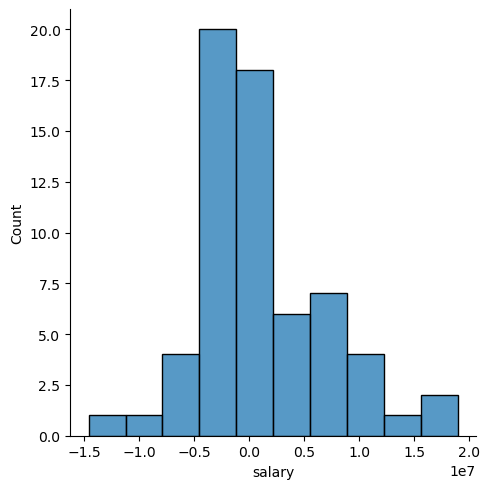

In [51]:
import seaborn as sns
sns.displot(diff)

In [52]:
import pickle
pickle.dump(lr, open('./model.sav', 'wb'))